<a href="https://colab.research.google.com/github/nidam2305/nidam/blob/main/pp/interfazipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FINAL

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding
import plotly.graph_objects as go
from plotly.subplots import make_subplots

PRIVATE_KEY_X = rsa.generate_private_key(public_exponent=65537, key_size=2048)
PUBLIC_KEY_X = PRIVATE_KEY_X.public_key()

def cifrar_cadena_rsa(cadena, public_key):
    data_to_encrypt = str(cadena).encode('utf-8')
    ciphertext = public_key.encrypt(
        data_to_encrypt,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    return ciphertext.hex()

def descifrar_cadena_rsa(cadena_cifrada_hex, private_key):
    try:
        ciphertext = bytes.fromhex(cadena_cifrada_hex)
        plaintext = private_key.decrypt(
            ciphertext,
            padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
        )
        return plaintext.decode('utf-8')
    except Exception:
        return "[ERROR DESCIFRANDO]"

def cifrar_y_descifrar_datos_de_entrenamiento(X, public_key, private_key):
    print("\n" + "~"*70)
    print("Módulo de Seguridad RSA: ")
    print("Integridad verificada.")
    print("-" * 70)
    return X

def cifrar_y_descifrar_respuestas_rsa(respuestas_binarias):
    private_key_temp = rsa.generate_private_key(public_exponent=65537, key_size=2048)
    public_key_temp = private_key_temp.public_key()
    data_to_encrypt = "".join(map(str, respuestas_binarias)).encode('utf-8')
    ciphertext = public_key_temp.encrypt(
        data_to_encrypt,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    plaintext = private_key_temp.decrypt(
        ciphertext,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    plaintext_str = plaintext.decode('utf-8')
    descifrado_binario = [int(char) for char in plaintext_str]
    return descifrado_binario, ciphertext.hex()

In [4]:
print(" DATOS ")
num_filas = 50
X_sim = np.random.randint(0, 2, size=(num_filas, 30))
y_sim = np.random.choice(["Pintura", "Plomeria", "Electricidad", "Carpinteria", "Limpieza", "Mantenimiento General"], size=num_filas)
datos = pd.DataFrame(X_sim)
datos.columns = [f'P{i+1}' for i in range(30)]
datos['Especialidad'] = y_sim

X = datos.iloc[:, :-1].values
y_texto = datos.iloc[:, -1].values
X = cifrar_y_descifrar_datos_de_entrenamiento(X, PUBLIC_KEY_X, PRIVATE_KEY_X)

encoder = LabelBinarizer()
y_one_hot = encoder.fit_transform(y_texto)
especialidades = encoder.classes_

X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42
)

modelo_mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=False
)

print("\n Entrenando la Red Neuronal Multicapa (MLP) ")
modelo_mlp.fit(X_train, y_train)
print(" Entrenamiento Finalizado ")

 DATOS 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Módulo de Seguridad RSA: 
Integridad verificada.
----------------------------------------------------------------------

 Entrenando la Red Neuronal Multicapa (MLP) 
 Entrenamiento Finalizado 


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
CUESTIONARIO = {
    "Pintura": [
        "¿Posee experiencia aplicando recubrimientos industriales de dos componentes (epoxicos o poliuretanos)?",
        "¿Ha recibido capacitacion formal en el uso y mantenimiento seguro de una pistola de pulverizacion airless?",
        "¿Sabe como preparar adecuadamente una superficie metalica para evitar el oxido (corrosion) antes de pintar?",
        "¿Puede distinguir entre el uso correcto de una brocha de cerdas naturales y una de cerdas sinteticas?",
        "¿Esta familiarizado/a con la tecnica de 'cortar' (pintar bordes) a mano alzada sin usar cinta de enmascarar?"
    ],
    "Carpinteria": [
        "¿Esta certificado/a para operar una sierra de mesa o sierra ingletadora de forma independiente y segura?",
        "¿Tiene experiencia en la instalacion de pisos laminados o de madera dura?",
        "¿Sabe como realizar un ensamble de caja y espiga para marcos estructurales?",
        "¿Puede leer e interpretar planos de mobiliario o cortes de madera?",
        "¿Sabe como identificar y trabajar con diferentes tipos de chapas o laminados de madera?"
    ],
    "Limpieza": [
        "¿Ha recibido capacitacion certificacion en el protocolo para el manejo y descarte de fluidos biologicos (derrames)?",
        "¿Conoce el procedimiento correcto para la dilucion exacta de desinfectantes concentrados?",
        "¿Ha trabajado anteriormente con maquinas abrillantadoras o fregadoras industriales de pisos?",
        "¿Está familiarizado/a con los codigos de colores para la limpieza de diferentes areas?",
        "¿Puede identificar si un producto es un detergente, desinfectante o sanitizante simplemente leyendo la etiqueta?"
    ],
    "Plomeria": [
        "¿Tiene conocimientos sobre la soldadura de tuberias de cobre o la union con estaño y fundente?",
        "¿Esta certificado/a o posee experiencia en la instalacion de calentadores de agua a gas o electricos?",
        "¿Sabe como utilizar y realizar mantenimiento basico a una maquina desatascadora (serpiente electrica)?",
        "¿Ha reparado o reemplazado valvulas de descarga (flushometers) en inodoros comerciales?",
        "¿Puede identificar y reparar problemas de golpe de ariete (water hammer) en un sistema de tuberias?"
    ],
    "Electricidad": [
        "¿Posee algún nivel de certificacion o licencia de electricista vigente?",
        "¿Sabe como probar y diagnosticar fallas en un circuito utilizando un multimetro?",
        "¿Tiene experiencia instalando o reemplazando interruptores de circuito de falla a tierra (GFCI)?",
        "¿Esta familiarizado/a con los codigos de colores estandar para cableado de corriente alterna (AC)?",
        "¿Puede realizar el cableado e instalacion de un tablero de distribucion (panel eléctrico)?"
    ],
    "Mantenimiento General": [
        "¿Tiene experiencia realizando reparaciones menores en sistemas de HVAC (aire acondicionado/calefaccion)?",
        "¿Sabe cóómo reparar o reemplazar una cerradura completa, incluyendo la manija y el pestillo?",
        "¿Esta familiarizado/a con la reparacion o instalacion de yeso (drywall) o paneles de techo suspendido?",
        "¿Posee conocimientos basicos para realizar reparaciones de albañileria (ej. rejuntar azulejos)?",
        "¿Sabe como realizar una evaluacion de seguridad basica para un area de trabajo antes de iniciar una reparacion?"
    ]
}

def ejecutar_cuestionario_y_obtener_respuestas():
    print("\n" + "="*70)
    print("CUESTIONARIO DE EVALUACION DE ESPECIALIDADES (30 Preguntas)")
    print("INSTRUCCIÓN: Responda con '1' para SI o '0' para NO.")
    print("="*70)

    respuestas_binarias = []
    for especialidad, preguntas in CUESTIONARIO.items():
        print(f"\n Seccion: {especialidad} ")
        for i, pregunta in enumerate(preguntas):
            while True:
                respuesta = input(f"      {i+1}. {pregunta} (1/0): ").strip()
                if respuesta in ['1', '0']:
                    valor_binario = int(respuesta)
                    respuestas_binarias.append(valor_binario)
                    break
                else:
                    print("Respuesta no valida. Por favor, responde con '1' (Si) o '0' (No).")
    return respuestas_binarias

def obtener_datos_candidato_y_puesto():
    print("\n" + "#"*70)
    print("ENTRADA DE DATOS ")
    print("#"*70)
    nombre = input("Nombre completo: ")
    email = input("Email: ")
    telefono = input("Teléfono: ")

    nombre_cifrado = cifrar_cadena_rsa(nombre, PUBLIC_KEY_X)
    email_cifrado = cifrar_cadena_rsa(email, PUBLIC_KEY_X)

    print("\n Datos personales cifrados.")
    print(f"Nombre cifrado: {nombre_cifrado[:20]}...")

    print("\n Puestos Disponibles ")
    for i, esp in enumerate(especialidades):
        print(f" {i+1}. {esp}")

    while True:
        try:
            opcion = int(input("Ingrese el numero del puesto al que aspira: "))
            if 1 <= opcion <= len(especialidades):
                puesto_deseado = especialidades[opcion - 1]
                break
            else:
                print("Opción no valida. Intente de nuevo.")
        except ValueError:
            print("Entrada no valida. Ingrese un numero.")

    return nombre, puesto_deseado, nombre_cifrado, email_cifrado

def analizar_resultados(puesto_deseado, probabilidades_ordenadas, umbral_minimo=0.25):
    print("\n" + "!"*70)
    print(f"ANSLISIS DE APTITUD PARA {puesto_deseado.upper()}")
    print("!"*70)

    puesto_predicho = probabilidades_ordenadas[0][0]
    prob_deseada = next(prob[1] for prob in probabilidades_ordenadas if prob[0] == puesto_deseado)

    if puesto_deseado.lower() == puesto_predicho.lower() and prob_deseada * 100 > 30:
        veredicto = f"APTO. ¡Excelente Coincidencia! Su mejor aptitud ({prob_deseada*100:.2f}%) coincide con el puesto solicitado."
        print(f" Estatus: **{veredicto}**")
    elif prob_deseada > umbral_minimo:
        veredicto = f"APTO CONDICIONAL. Aunque su mayor aptitud es **{puesto_predicho}**, usted tiene una alta puntuación ({prob_deseada*100:.2f}%) para el puesto solicitado. Se le considerara."
        print(f" Estatus: **{veredicto}**")
    else:
        veredicto = f"NO APTO. Su puntuacion para **{puesto_deseado}** es baja ({prob_deseada*100:.2f}%)."
        print(f"00 Estatus: **{veredicto}**")

    print("\n Sugerencias de Puestos Alternativos ")
    top_sugerencias = []

    for puesto, prob in probabilidades_ordenadas:
        if puesto != puesto_deseado and prob > umbral_minimo:
            top_sugerencias.append((puesto, prob))
        if len(top_sugerencias) >= 3:
            break

    if top_sugerencias:
        print("En base a sus habilidades evaluadas, podria ser un mejor candidato para:")
        for i, (puesto, prob) in enumerate(top_sugerencias):
            print(f" {i+1}. **{puesto}** (Puntuacion: {prob * 100:.2f}%)")
    else:
        print("No se encontraron puestos alternativos con una puntuacion significativa.")
    print("!"*70)


def iniciar_proceso_candidato():
    nombre, puesto_deseado, nombre_cifrado, email_cifrado = obtener_datos_candidato_y_puesto()
    respuestas_candidato = ejecutar_cuestionario_y_obtener_respuestas()

    if len(respuestas_candidato) != 30:
        print("\n ERROR: El cuestionario no genero 30 respuestas. Proceso terminado.")
        return

    respuestas_descifradas, vector_cifrado_hex = cifrar_y_descifrar_respuestas_rsa(respuestas_candidato)
    nuevo_candidato_vector = np.array([respuestas_descifradas])
    prediccion_proba = modelo_mlp.predict_proba(nuevo_candidato_vector)[0]

    probabilidades_dict = dict(zip(especialidades, np.round(prediccion_proba, 4)))
    probabilidades_ordenadas = sorted(probabilidades_dict.items(), key=lambda item: item[1], reverse=True)

    print("\n" + "="*70)
    print(f"RESULTADOS PARA EL CANDIDATO: {nombre} (Puesto Solicitado: {puesto_deseado})")
    print("="*70)

    analizar_resultados(puesto_deseado, probabilidades_ordenadas)

iniciar_proceso_candidato()


######################################################################
ENTRADA DE DATOS 
######################################################################
Nombre completo: kas
Email: lukamber6@gmail.com
Teléfono: 4678596453

 Datos personales cifrados.
Nombre cifrado: 46a42a2192b794c84c1a...

 Puestos Disponibles 
 1. Carpinteria
 2. Electricidad
 3. Limpieza
 4. Mantenimiento General
 5. Pintura
 6. Plomeria
Ingrese el numero del puesto al que aspira: 3

CUESTIONARIO DE EVALUACION DE ESPECIALIDADES (30 Preguntas)
INSTRUCCIÓN: Responda con '1' para SI o '0' para NO.

 Seccion: Pintura 
      1. ¿Posee experiencia aplicando recubrimientos industriales de dos componentes (epoxicos o poliuretanos)? (1/0): 1
      2. ¿Ha recibido capacitacion formal en el uso y mantenimiento seguro de una pistola de pulverizacion airless? (1/0): 0
      3. ¿Sabe como preparar adecuadamente una superficie metalica para evitar el oxido (corrosion) antes de pintar? (1/0): 0
      4. ¿Puede distinguir en

Resumen financiero 
Inversion inicial (CAPEX): 500,000.00
Ingresos anuales estimados (año 1): 1,210,000.00
Costos variables anuales (año 1): 108,000.00
Costos fijos anuales (año 1): 80,000.00
VAN (NPV) a tasa 12.0%: 6,040,239.38
TIR (IRR): 0.3153
Periodo de recuperacion (años): 0.49
ROI simple (over 7 años): 2018.5%



,Año,Flujo,Flujo descontado,Cumulado
0,0,"-500,000.00","-500,000.00","-500,000.00"
1,1,"1,022,000.00","912,500.00","522,000.00"
2,2,"1,154,560.00","920,408.16","1,676,560.00"
3,3,"1,303,652.80","927,914.31","2,980,212.80"
4,4,"1,471,303.98","935,040.28","4,451,516.78"
5,5,"1,659,785.12","941,806.65","6,111,301.90"
6,6,"1,871,643.48","948,232.83","7,982,945.38"
7,7,"2,109,735.37","954,337.14","10,092,680.75"


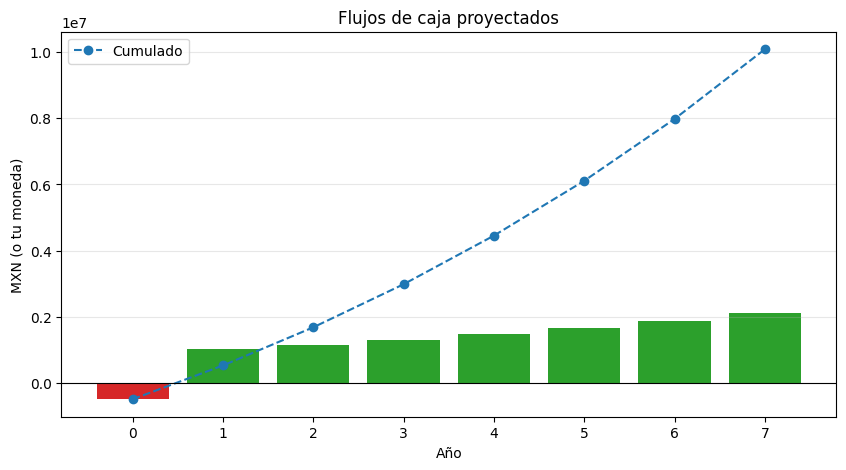


 Analisis de sensibilidad (NPV)


ValueError: Index contains duplicate entries, cannot reshape

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# parametros ajustados
years = 7  # horizonte en años
discount_rate = 0.12  # tasa de descuento (12% anual)

# Inversion inicial
dev_cost = 450000.0          # costo de desarrollo inicial (MXN)
other_capex = 50000.0        # otros gastos iniciales (licencias, consultorias)
capex_initial = dev_cost + other_capex

fixed_annual_cost = 80000.0  # hosting, soporte, personal, mantenimiento por año
variable_cost_per_candidate = 15.0  # costo (procesamiento, entrevistas, verificaciones) por candidato evaluado

# uso y motenizacion
candidates_per_month = 600   # CVs que suben al sistema por mes
conversion_to_paid_client = 0.10  # empresas que contratan plan de pago
avg_subscription_per_client_annual = 40000.0  # ingreso anual por empresa cliente (suscripcion)
commission_per_hire = 800.0  # ingreso por cada contratacion gestionada
avg_hires_per_month_platform = 25.0  # contrataciones gestionadas por mes

# Ahorros y beneficios intangibles monetizados
avg_cost_per_bad_hire = 70000.0  # costo estimado de una mala contratacion (capacitacion, rotacion, productividad)
baseline_bad_hires_per_year = 20.0  # cuantas malas contrataciones ocurrian antes
reduction_bad_hires_pct = 0.40  # reduccion por usar el sistema (40% menos malas contrataciones)
monetized_savings_per_year = baseline_bad_hires_per_year * reduction_bad_hires_pct * avg_cost_per_bad_hire

# Otros ingresos (publicidad, data insights, etc.)
other_annual_income = 10000.0

# Cálculos anuales
months_per_year = 12
candidates_per_year = candidates_per_month * months_per_year
paid_clients = conversion_to_paid_client * 100  # suposicion  sobre 100 empresas objetivo

# Ingresos anuales por suscripciones y comisiones
annual_subscription_income = paid_clients * avg_subscription_per_client_annual
annual_commission_income = commission_per_hire * (avg_hires_per_month_platform * months_per_year)
annual_income_base = annual_subscription_income + annual_commission_income + other_annual_income + monetized_savings_per_year

# Costos variables anuales (por candidato evaluado)
annual_variable_costs = variable_cost_per_candidate * candidates_per_year

# Construir flujos de caja año por año
years_arr = np.arange(0, years + 1)  # incluir año 0 (inversion)
cashflows = np.zeros(years + 1)
# Año 0: CAPEX negativo
cashflows[0] = -capex_initial
for y in range(1, years + 1):
    income = annual_income_base * (1 + 0.12)**(y-1)  # suponer crecimiento de ingresos 12% anual
    fixed_costs = fixed_annual_cost * (1 + 0.05)**(y-1)  # crecimiento 5% anual de costos fijos
    variable_costs = annual_variable_costs * (1 + 0.08)**(y-1)  # crecimiento 8% anual del volumen
    cashflows[y] = income - (fixed_costs + variable_costs)

# Cálculos financieros
def npv(rate, cashflows):
    return np.sum(cashflows / (1 + rate) ** np.arange(0, len(cashflows)))

def irr(cashflows):
    try:
        return np.irr(cashflows)
    except Exception:
        r = np.roots(cashflows[::-1])
        r = r[np.isreal(r)].real
        r = r[r > -1]
        return r[0] if r.size > 0 else np.nan

npv_val = npv(discount_rate, cashflows)
irr_val = irr(cashflows)
payback = None
cumulative = np.cumsum(cashflows)
for i in range(1, len(cumulative)):
    if cumulative[i] >= 0:
        prev = cumulative[i-1]
        curr = cumulative[i]
        frac = -prev / (curr - prev)
        payback = (i-1) + frac
        break

total_invested = -cashflows[0]
roi_simple = (np.sum(cashflows[1:]) - total_invested) / total_invested

# Mostrar resultados en tabla
df = pd.DataFrame({
    "Año": years_arr,
    "Flujo": cashflows,
    "Flujo descontado": cashflows / (1 + discount_rate) ** years_arr,
    "Cumulado": np.cumsum(cashflows)
})

# Imprimir resumen
print("Resumen financiero ")
print(f"Inversion inicial (CAPEX): {capex_initial:,.2f}")
print(f"Ingresos anuales estimados (año 1): {annual_income_base:,.2f}")
print(f"Costos variables anuales (año 1): {annual_variable_costs:,.2f}")
print(f"Costos fijos anuales (año 1): {fixed_annual_cost:,.2f}")
print(f"VAN (NPV) a tasa {discount_rate*100:.1f}%: {npv_val:,.2f}")
print(f"TIR (IRR): {irr_val:.4f}")
if payback is not None:
    print(f"Periodo de recuperacion (años): {payback:.2f}")
else:
    print("Periodo de recuperacion: no alcanzado dentro del horizonte")
print(f"ROI simple (over {years} años): {roi_simple*100:.1f}%\n")

# Mostrar tabla resumen
pd.options.display.float_format = '{:,.2f}'.format
display(df)

# Graficar flujos y ROI acumulado
plt.figure(figsize=(10,5))
plt.bar(years_arr, cashflows, color=['tab:red' if x<0 else 'tab:green' for x in cashflows])
plt.plot(years_arr, np.cumsum(cashflows), marker='o', linestyle='--', label='Cumulado')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Año')
plt.ylabel('MXN (o tu moneda)')
plt.title('Flujos de caja proyectados')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# variacion en candidatos/mes y en tasa de conversion a clientes pagados
candidates_scenarios = [300, 600, 1200]
conv_scenarios = [0.05, 0.10, 0.20]
sensitivity = []
for cand in candidates_scenarios:
    for conv in conv_scenarios:
        cpyr = cand * months_per_year
        paid_clients_s = conv * 100
        income_s = paid_clients_s * avg_subscription_per_client_annual + commission_per_hire * (avg_hires_per_month_platform * months_per_year) + other_annual_income + monetized_savings_per_year
        var_costs_s = variable_cost_per_candidate * cpyr
        cashflows_s = np.zeros(years + 1)
        cashflows_s[0] = -capex_initial
        for y in range(1, years + 1):
            income = income_s * (1 + 0.12)**(y-1)
            fixed_costs = fixed_annual_cost * (1 + 0.05)**(y-1)
            variable_costs = var_costs_s * (1 + 0.08)**(y-1)
            cashflows_s[y] = income - (fixed_costs + variable_costs)
        npv_s = npv(discount_rate, cashflows_s)
        sensitivity.append({"candidates_per_month": cand, "conv_rate": "conv", "NPV": npv_s})

sens_df = pd.DataFrame(sensitivity)
print("\n----- Analisis de sensibilidad (NPV) -----")
display(sens_df.pivot("candidates_per_month", "conv_rate", "NPV"))


In [4]:
!pip install gradio cryptography plotly -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gradio as gr
import hashlib


# 2. DEFINICION DE CLAVES Y FUNCIONES DE SEGURIDAD (Cifrado RSA)
PRIVATE_KEY_X = rsa.generate_private_key(public_exponent=65537, key_size=2048)
PUBLIC_KEY_X = PRIVATE_KEY_X.public_key()

def cifrar_cadena_rsa(cadena, public_key):
    data_to_encrypt = str(cadena).encode('utf-8')
    ciphertext = public_key.encrypt(
        data_to_encrypt,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    return ciphertext.hex()

def cifrar_y_descifrar_respuestas_rsa(respuestas_binarias):
    private_key_temp = rsa.generate_private_key(public_exponent=65537, key_size=2048)
    public_key_temp = private_key_temp.public_key()
    data_to_encrypt = "".join(map(str, respuestas_binarias)).encode('utf-8')
    ciphertext = public_key_temp.encrypt(
        data_to_encrypt,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    plaintext = private_key_temp.decrypt(
        ciphertext,
        padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None)
    )
    plaintext_str = plaintext.decode('utf-8')
    descifrado_binario = [int(char) for char in plaintext_str]
    return descifrado_binario, ciphertext.hex()

CUESTIONARIO = {
    "Pintura": [
        "¿Posee experiencia aplicando recubrimientos industriales de dos componentes (epoxicos o poliuretanos)?",
        "¿Ha recibido capacitacion formal en el uso y mantenimiento seguro de una pistola de pulverizacion airless?",
        "¿Sabe como preparar adecuadamente una superficie metalica para evitar el oxido (corrosion) antes de pintar?",
        "¿Puede distinguir entre el uso correcto de una brocha de cerdas naturales y una de cerdas sinteticas?",
        "¿Esta familiarizado/a con la técnica de 'cortar' (pintar bordes) a mano alzada sin usar cinta de enmascarar?"
    ],
    "Carpintería": [
        "¿Está certificado/a para operar una sierra de mesa o sierra ingletadora de forma independiente y segura?",
        "¿Tiene experiencia en la instalación de pisos laminados o de madera dura?",
        "¿Sabe cómo realizar un ensamble de caja y espiga para marcos estructurales?",
        "¿Puede leer e interpretar planos de mobiliario o cortes de madera?",
        "¿Sabe cómo identificar y trabajar con diferentes tipos de chapas o laminados de madera?"
    ],
    "Limpieza": [
        "¿Ha recibido capacitación o certificación en el protocolo para el manejo y descarte de fluidos biológicos (derrames)?",
        "¿Conoce el procedimiento correcto para la dilución exacta de desinfectantes concentrados?",
        "¿Ha trabajado anteriormente con máquinas abrillantadoras o fregadoras industriales de pisos?",
        "¿Está familiarizado/a con los códigos de colores para la limpieza de diferentes áreas?",
        "¿Puede identificar si un producto es un detergente, desinfectante o sanitizante simplemente leyendo la etiqueta?"
    ],
    "Plomería": [
        "¿Tiene conocimientos sobre la soldadura de tuberías de cobre o la unión con estaño y fundente?",
        "¿Está certificado/a o posee experiencia en la instalación de calentadores de agua a gas o eléctricos?",
        "¿Sabe cómo utilizar y realizar mantenimiento básico a una máquina desatascadora (serpiente eléctrica)?",
        "¿Ha reparado o reemplazado válvulas de descarga (flushometers) en inodoros comerciales?",
        "¿Puede identificar y reparar problemas de golpe de ariete (water hammer) en un sistema de tuberías?"
    ],
    "Electricidad": [
        "¿Posee algún nivel de certificación o licencia de electricista vigente?",
        "¿Sabe cómo probar y diagnosticar fallas en un circuito utilizando un multímetro?",
        "¿Tiene experiencia instalando o reemplazando interruptores de circuito de falla a tierra (GFCI)?",
        "¿Está familiarizado/a con los códigos de colores estándar para cableado de corriente alterna (AC)?",
        "¿Puede realizar el cableado e instalación de un tablero de distribución (panel eléctrico)?"
    ],
    "Mantenimiento General": [
        "¿Tiene experiencia realizando reparaciones menores en sistemas de HVAC (aire acondicionado/calefacción)?",
        "¿Sabe cómo reparar o reemplazar una cerradura completa, incluyendo la manija y el pestillo?",
        "¿Está familiarizado/a con la reparación o instalación de yeso (drywall) o paneles de techo suspendido?",
        "¿Posee conocimientos básicos para realizar reparaciones de albañilería (ej. rejuntar azulejos)?",
        "¿Sabe cómo realizar una evaluación de seguridad básica para un área de trabajo antes de iniciar una reparación?"
    ]
}

# CONCATENAR TODAS LAS PREGUNTAS EN UNA LISTA ÚNICA DE 30
todas_las_preguntas = []
for preguntas in CUESTIONARIO.values():
    todas_las_preguntas.extend(preguntas)

# Preparación y Entrenamiento del Modelo MLP (Necesario para la función de predicción)
num_filas = 50
X_sim = np.random.randint(0, 2, size=(num_filas, 30))
y_sim = np.random.choice(list(CUESTIONARIO.keys()), size=num_filas)
datos = pd.DataFrame(X_sim)
datos.columns = [f'P{i+1}' for i in range(30)]
datos['Especialidad'] = y_sim

X = datos.iloc[:, :-1].values
y_texto = datos.iloc[:, -1].values
# Simulacin de cifrado/descifrado (no hace nada en la práctica)
X = X

encoder = LabelBinarizer()
y_one_hot = encoder.fit_transform(y_texto)
especialidades = encoder.classes_

X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42
)

modelo_mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=False
)
modelo_mlp.fit(X_train, y_train)


def procesar_candidato_anonimizado_completo(nombre, telefono, correo, puesto_elegido, *respuestas_cuestionario):
    """
    Función que recibe 4 datos personales + 30 respuestas del cuestionario.
    """

    # 1. VALIDACION Y PREPARACIÓN DE RESPUESTAS BINARIAS
    if len(respuestas_cuestionario) != 30:
         return "**[ERROR]** Faltan respuestas del cuestionario. Asegúrese de responder las 30 preguntas.", ""

    respuestas_binarias = []
    for resp in respuestas_cuestionario:
        if resp is None:
            return "**[ERROR]** Por favor, responda todas las preguntas. No deje ninguna en blanco.", ""
        respuestas_binarias.append(1 if resp.lower() == 'si' else 0)

    # 2. ANONIMIZACION (Cifrado de datos sensibles)
    nombre_cifrado = cifrar_cadena_rsa(nombre, PUBLIC_KEY_X)

    # 3. SEGURIDAD: Cifrar y Descifrar Respuestas (Integridad)
    respuestas_descifradas, vector_cifrado_hex = cifrar_y_descifrar_respuestas_rsa(respuestas_binarias)
    nuevo_candidato_vector = np.array([respuestas_descifradas])

    # 4. PREDICCION CON MLP
    prediccion_proba = modelo_mlp.predict_proba(nuevo_candidato_vector)[0]

    # 5. ANALISIS DE RESULTADOS
    puesto_deseado = puesto_elegido.strip()
    probabilidades_dict = dict(zip(especialidades, np.round(prediccion_proba, 4)))
    probabilidades_ordenadas = sorted(probabilidades_dict.items(), key=lambda item: item[1], reverse=True)

    # Veredicto y Sugerencias
    umbral_minimo = 0.25
    prob_deseada = next((prob[1] for prob in probabilidades_ordenadas if prob[0].lower() == puesto_deseado.lower()), 0)
    puesto_predicho = probabilidades_ordenadas[0][0]

    if puesto_deseado.lower() == puesto_predicho.lower() and prob_deseada * 100 > 30:
        veredicto = f"APTO. ¡Excelente Coincidencia! Su mejor aptitud ({prob_deseada*100:.2f}%) coincide con el puesto solicitado."
    elif prob_deseada > umbral_minimo:
        veredicto = f"APTO CONDICIONAL. Aunque su mayor aptitud es **{puesto_predicho}**, usted tiene una alta puntuación ({prob_deseada*100:.2f}%) para el puesto solicitado. Se le considerará."
    else:
        veredicto = f"NO APTO. Su puntuación para **{puesto_deseado}** es baja ({prob_deseada*100:.2f}%)."

    # Sugerencias
    top_sugerencias = []
    for puesto, prob in probabilidades_ordenadas:
        if puesto.lower() != puesto_deseado.lower() and prob > umbral_minimo:
            top_sugerencias.append((puesto, prob))
        if len(top_sugerencias) >= 3:
            break

    sugerencias_html = ""
    if top_sugerencias:
        for i, (puesto, prob) in enumerate(top_sugerencias):
            sugerencias_html += f"<li>**{puesto}** (Puntuación: {prob * 100:.2f}%)</li>"
        sugerencias_texto = f"En base a sus habilidades evaluadas, podría ser un mejor candidato para:\n<ul>{sugerencias_html}</ul>"
    else:
        sugerencias_texto = "No se encontraron puestos alternativos con una puntuación significativa (probabilidad < 25%)."

    # 6. FORMATO DE SALIDA
    resumen_salida = (
        f"El nombre y correo fueron ANÓNIMIZADOS.\n"
        f" `{nombre_cifrado[:15]}...`\n\n"
        f" **EVALUACION"
        f"**Puesto Solicitado:** {puesto_deseado.upper()}\n"
        f"**Resultado:** {veredicto}\n"
        f"\n SUGERENCIAS \n"
        f"{sugerencias_texto}"
    )

    return resumen_salida


with gr.Blocks(title="Sistema de Pre-selección Anonimizado (Anti-Sesgo)") as demo:
    gr.Markdown("#  Prototipo Anti-Sesgos: Anonimización de Candidatos y Predicción MLP")
    gr.Markdown("Este sistema combina **criptografía RSA** para anonimizar datos personales y una **Red Neuronal (MLP)** para predecir la aptitud del candidato, mitigando sesgos.")

    # --- PESTAÑA 1: DATOS SENSIBLES Y PUESTO ---
    with gr.Tab("1. Datos y Puesto Solicitado"):
        gr.Markdown("### Ingreso de Datos Sensibles (Serán cifrados con RSA)")
        with gr.Row():
            input_nombre = gr.Textbox(label="Nombre", placeholder="Tu Nombre Completo")
            input_telefono = gr.Textbox(label="Teléfono", placeholder="55 1234 5678")
            input_correo = gr.Textbox(label="Correo", placeholder="correo@ejemplo.com")

        input_puesto = gr.Dropdown(
            label="Puesto Elegido (Debe coincidir con una Especialidad)",
            choices=list(especialidades)
        )

    # --- PESTAÑA 2: CUESTIONARIO COMPLETO (30 PREGUNTAS) ---
    input_respuestas_list = []
    with gr.Tab("2. Cuestionario de Aptitud (30 Preguntas)"):

        for especialidad, preguntas in CUESTIONARIO.items():
            gr.Markdown(f"### Sección: {especialidad} (Responda Sí/No)")
            for i, pregunta in enumerate(preguntas):
                # Generamos 30 componentes de radio, uno por pregunta
                input_q = gr.Radio(
                    ["Sí", "No"],
                    label=f"P{len(input_respuestas_list)+1}. {pregunta}"
                )
                input_respuestas_list.append(input_q)

    # --- BOTÓN Y SALIDA ---
    btn = gr.Button(" Evaluar Candidato ")
    output_resumen = gr.Markdown(label="RESULTADO DE LA EVALUACIÓN Y SUGERENCIA")

    # 6. CONEXIÓN DEL BOTÓN CON TODAS LAS ENTRADAS
    # La función necesita 4 datos personales + 30 respuestas (34 inputs en total)
    inputs_totales = [input_nombre, input_telefono, input_correo, input_puesto] + input_respuestas_list

    btn.click(
        fn=procesar_candidato_anonimizado_completo,
        inputs=inputs_totales,
        outputs=output_resumen
    )

## --- 7. Ejecutar la Aplicación Gradio -
demo.launch(share=False)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>